<a href="https://colab.research.google.com/github/ImJongHwan/practice-ml-nlp/blob/main/6_machine_learning_introduction/4_ML_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 자동 미분과 선형 회귀

https://wikidocs.net/111472



## 자동 미분

In [6]:
import tensorflow as tf

In [7]:
w = tf.Variable(2.)

def f(w):
  y = w**2
  z = 2*y + 5
  return z

In [8]:
with tf.GradientTape() as tape:
  z = f(w)

gradients = tape.gradient(z, [w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


## 자동 미분을 이용한 선형 회귀 구현

In [10]:
w = tf.Variable(4.0)
b = tf.Variable(1.0)

In [11]:
@tf.function
def hypothesis(x):
  return w*x + b

In [12]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[15. 21. 23. 25.]


In [13]:
@tf.function
def mse_loss(y_pred, y):
  return tf.reduce_mean(tf.square(y_pred - y))

In [16]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [11, 22, 33, 44, 53, 66, 77, 87, 95]

In [17]:
optimizer = tf.optimizers.SGD(0.01)

In [20]:
for i in range(301):
  with tf.GradientTape() as tape:
    y_pred = hypothesis(x)
    cost = mse_loss(y_pred, y)

  gradients = tape.gradient(cost, [w, b])

  optimizer.apply_gradients(zip(gradients, [w, b]))

  if i % 10 == 0:
    print(f"epoch : {i:3} | w의 값 : {w.numpy():5.4f} | b의 값: {b.numpy():5.4} | cost: {cost:5.6f}")

epoch :   0 | w의 값 : 9.6918 | b의 값: 1.894 | cost: 173.778076
epoch :  10 | w의 값 : 10.4979 | b의 값: 1.972 | cost: 1.348798
epoch :  20 | w의 값 : 10.5054 | b의 값: 1.925 | cost: 1.325962
epoch :  30 | w의 값 : 10.5126 | b의 값:  1.88 | cost: 1.304935
epoch :  40 | w의 값 : 10.5195 | b의 값: 1.837 | cost: 1.285576
epoch :  50 | w의 값 : 10.5261 | b의 값: 1.795 | cost: 1.267737
epoch :  60 | w의 값 : 10.5324 | b의 값: 1.755 | cost: 1.251314
epoch :  70 | w의 값 : 10.5385 | b의 값: 1.717 | cost: 1.236184
epoch :  80 | w의 값 : 10.5443 | b의 값:  1.68 | cost: 1.222252
epoch :  90 | w의 값 : 10.5499 | b의 값: 1.645 | cost: 1.209422
epoch : 100 | w의 값 : 10.5553 | b의 값: 1.611 | cost: 1.197604
epoch : 110 | w의 값 : 10.5605 | b의 값: 1.579 | cost: 1.186721
epoch : 120 | w의 값 : 10.5654 | b의 값: 1.547 | cost: 1.176698
epoch : 130 | w의 값 : 10.5702 | b의 값: 1.517 | cost: 1.167468
epoch : 140 | w의 값 : 10.5748 | b의 값: 1.489 | cost: 1.158965
epoch : 150 | w의 값 : 10.5791 | b의 값: 1.461 | cost: 1.151132
epoch : 160 | w의 값 : 10.5833 | b의 값: 1.

In [21]:
x_test=[3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[38.35414  54.294846 59.60841  64.92198 ]


## 케라스로 구현하는 선형 회귀

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [24]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [11, 22, 33, 44, 53, 66, 77, 87, 95]

model = Sequential()

model.add(Dense(1, input_dim=1, activation='linear'))

sgd = optimizers.SGD(lr=0.01)

model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

model.fit(x, y, epochs=300)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/300
1/1 [==============================] - 1s 759ms/step - loss: 4074.2175 - mse: 4074.2175
Epoch 2/300
1/1 [==============================] - 0s 13ms/step - loss: 502.3973 - mse: 502.3973
Epoch 3/300
1/1 [==============================] - 0s 11ms/step - loss: 62.9103 - mse: 62.9103
Epoch 4/300
1/1 [==============================] - 0s 11ms/step - loss: 8.8334 - mse: 8.8334
Epoch 5/300
1/1 [==============================] - 0s 15ms/step - loss: 2.1783 - mse: 2.1783
Epoch 6/300
1/1 [==============================] - 0s 10ms/step - loss: 1.3581 - mse: 1.3581
Epoch 7/300
1/1 [==============================] - 0s 13ms/step - loss: 1.2559 - mse: 1.2559
Epoch 8/300
1/1 [==============================] - 0s 27ms/step - loss: 1.2420 - mse: 1.2420
Epoch 9/300
1/1 [==============================] - 0s 11ms/step - loss: 1.2390 - mse: 1.2390
Epoch 10/300
1/1 [==============================] - 0s 13ms/step - loss: 1.2373 - mse: 1.2373
Epoch 11/300
1/1 [==============================] - 0s 1

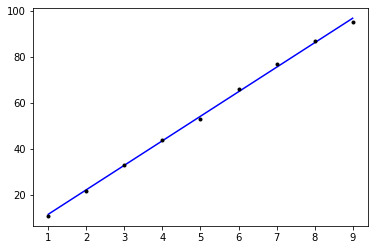

In [25]:
plt.plot(x, model.predict(x), 'b', x, y, 'k.')

In [26]:
print(model.predict([9.5]))

[[102.15595]]
